#### The problem statement requires us to build a regression model using Regularization (Ridge and Lasso) in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Data Preprocessing
- Load the data (CSV file provided)
- Understand the dataset
- Identify missing / null values
- Handling Categorical variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
#Checking for null values
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [7]:
#Checking for Row / Record wise null entries i.e., Entire row null
df.isnull().all(axis=1).sum()

0

In [8]:
#Checking for Column / Feature wise null entries i.e., Entire column null
df.isnull().all(axis=0).sum()

0

In [9]:
#Let's evaluate the % of null values column wise
for column in df.columns:
    print(column +" " + str(round(100 * (df[column].isnull().sum() / len(df[column].index)), 2)))

Id 0.0
MSSubClass 0.0
MSZoning 0.0
LotFrontage 17.74
LotArea 0.0
Street 0.0
Alley 93.77
LotShape 0.0
LandContour 0.0
Utilities 0.0
LotConfig 0.0
LandSlope 0.0
Neighborhood 0.0
Condition1 0.0
Condition2 0.0
BldgType 0.0
HouseStyle 0.0
OverallQual 0.0
OverallCond 0.0
YearBuilt 0.0
YearRemodAdd 0.0
RoofStyle 0.0
RoofMatl 0.0
Exterior1st 0.0
Exterior2nd 0.0
MasVnrType 0.55
MasVnrArea 0.55
ExterQual 0.0
ExterCond 0.0
Foundation 0.0
BsmtQual 2.53
BsmtCond 2.53
BsmtExposure 2.6
BsmtFinType1 2.53
BsmtFinSF1 0.0
BsmtFinType2 2.6
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
Heating 0.0
HeatingQC 0.0
CentralAir 0.0
Electrical 0.07
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
FullBath 0.0
HalfBath 0.0
BedroomAbvGr 0.0
KitchenAbvGr 0.0
KitchenQual 0.0
TotRmsAbvGrd 0.0
Functional 0.0
Fireplaces 0.0
FireplaceQu 47.26
GarageType 5.55
GarageYrBlt 5.55
GarageFinish 5.55
GarageCars 0.0
GarageArea 0.0
GarageQual 5.55
GarageCond 5.55
PavedDrive 0.0
WoodDeckSF 0

As we can see above some features like Alley, fence, PoolQC, Misc have high % of null values

In [10]:
#List all columns which have null values > 80%
null_percentage = 100 * (df.isnull().sum() / len(df))
columns_to_drop = null_percentage[null_percentage > 80].index.tolist()
print("Columns with NULL values > 80%")
print(columns_to_drop)

# Drop columns from the DataFrame where null values are > 80%
df.drop(columns=columns_to_drop, inplace=True)
print("Remaining columns")
print(df.columns)

Columns with NULL values > 80%
['Alley', 'PoolQC', 'Fence', 'MiscFeature']
Remaining columns
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'Garag

In [11]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

Upon further observation we can notice that there are quite a few columns where the value is marked as 0 is quite high, Let's see a summary of this. 

In [12]:
# Calculate the percentage of values equal to 0 for each column
zero_percentage = 100 * (df == 0).sum() / len(df)
columns_to_drop = []
#List columns where % of 0 values is > 80%
for column, percentage in zero_percentage.items():
    if percentage > 80:
        print(f"{column}: {percentage:.2f}%")
        columns_to_drop.append(column)
print(columns_to_drop)

BsmtFinSF2: 88.56%
LowQualFinSF: 98.22%
BsmtHalfBath: 94.38%
EnclosedPorch: 85.75%
3SsnPorch: 98.36%
ScreenPorch: 92.05%
PoolArea: 99.52%
MiscVal: 96.44%
['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


After further observation on these columns, we can say that these columns may not provide significant information or contribute to the analysis especially with their high % in 0 values. 
Ideally in such a situation, we would have 2 options. We can either drop these columns or we can impute or replace these 0's with the mean, median or mode of the column as per business case. 
For our use case, We can go ahead and drop these columns. 

We can also remove id as it's just for the record identification and won't be of any useful information for the model.

In [13]:
columns_to_drop.append('Id')
print(columns_to_drop)

['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Id']


In [14]:
df.drop(columns_to_drop, axis=1, inplace=True)
df.shape

(1460, 68)

In [15]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... GarageQual GarageCond PavedDrive  \
0    AllPub    Inside       Gtl  ...         TA         TA          Y   
1    AllPub       FR2       Gtl  ...         TA         TA          Y   
2    AllPub    Inside       Gtl  ...         TA         TA          Y   
3    AllPub    Corner       Gtl  ...         TA         TA          Y   
4    AllPub       FR2       Gtl  ...         TA         TA          Y   

  WoodDeckSF OpenPorchSF  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0          0          61       2    2008        WD         Normal    208500  
1        298           0       5    2007        WD         Normal    181500  
2          0          42       9    2008        WD         Normal    223500  
3          0          35       2    2006        WD        Abnorml    140000  
4        192          84      12    2008        WD         Normal    250000  

[5 rows x 68 columns]

Now that we have completed some basic data cleanup steps, let's go one step further to evaluate the correlation of these variables with our target variable which is the 'SalePrice'. For this we will use a heatmap or correlation matrix

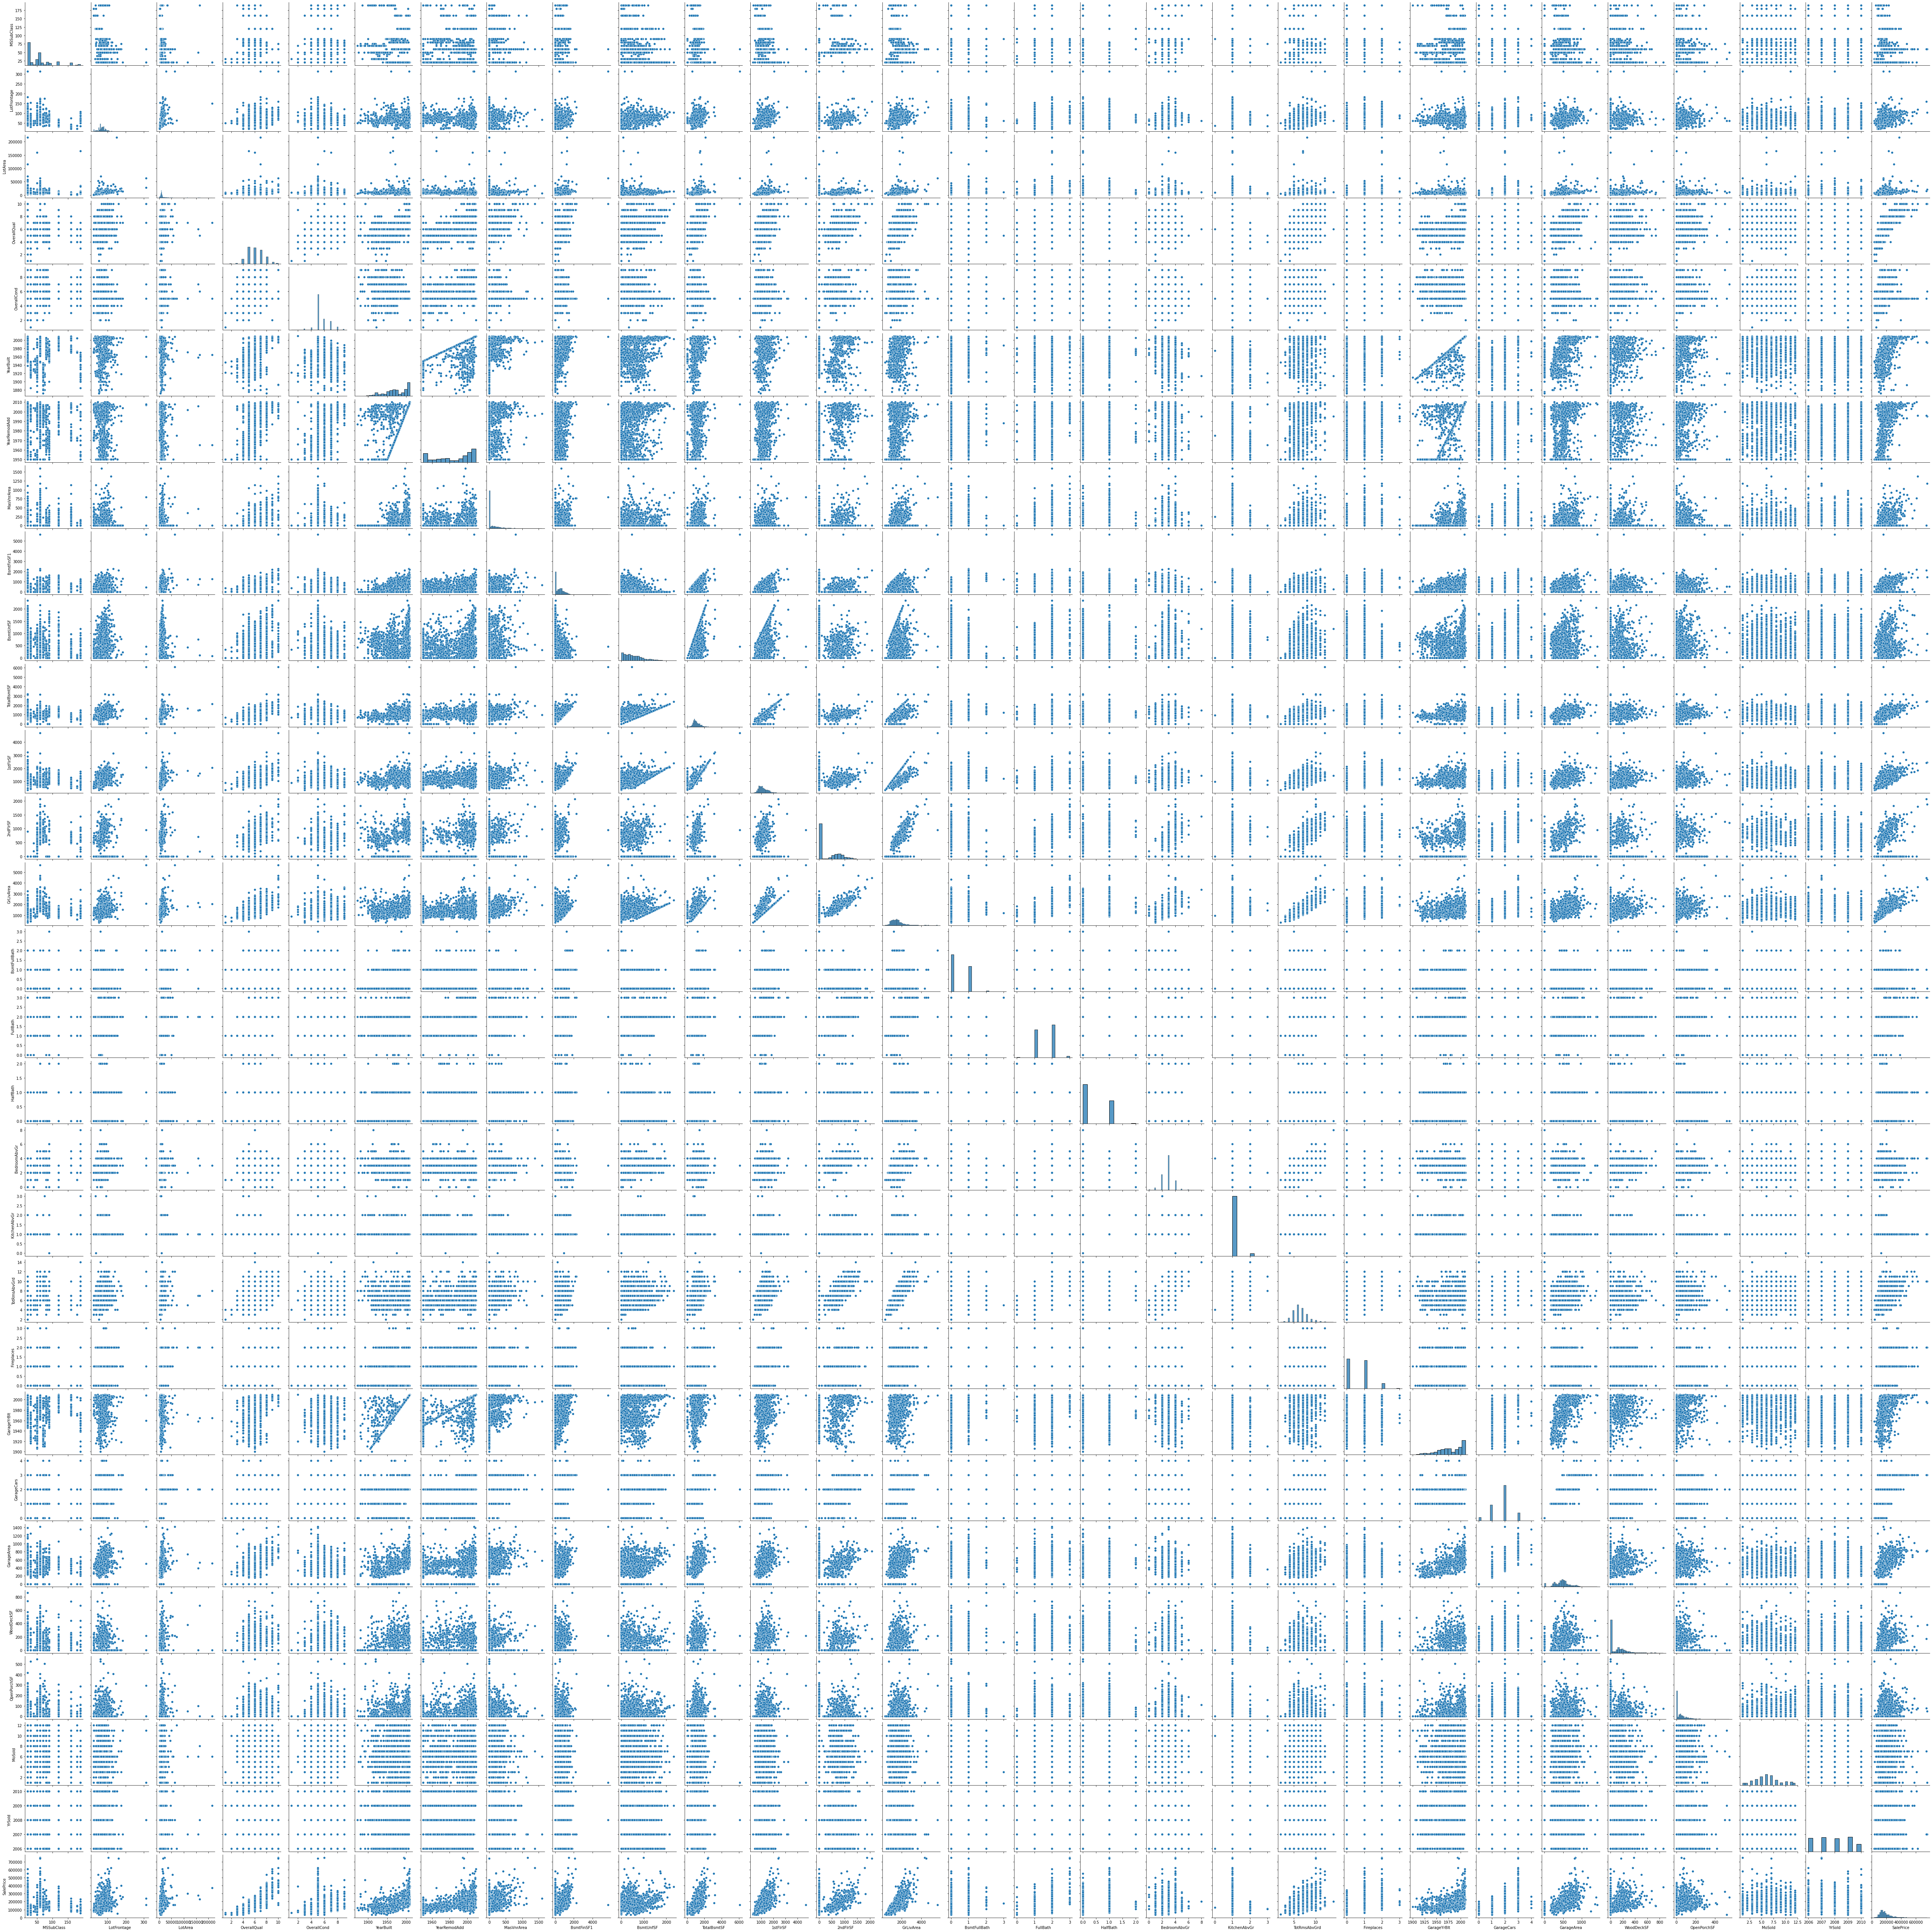

In [16]:
#Visualizing variables
sns.pairplot(df)
plt.show()

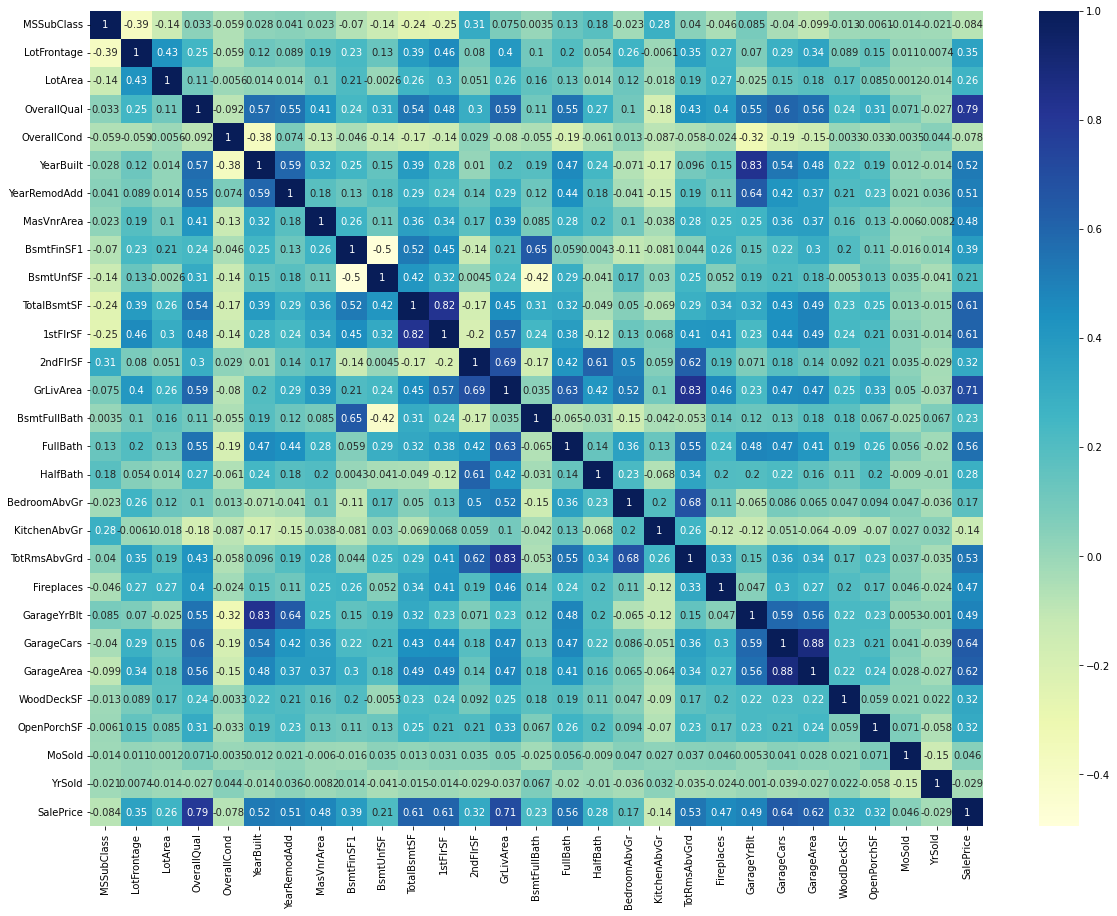

In [17]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Let's remove columns which have weak correlation with our target variable, Let's consider the range (-0.1 to 0.1) for deriving weak correlations. 

In [18]:
#Let's pick numeric variables from the dataframe
df_numericVals = df.select_dtypes(include='number')

In [19]:
columns_to_drop = []
for column in df_numericVals.columns:
    if column != 'SalePrice':
        cor = df[column].corr(df['SalePrice'])
        if (cor > -0.1) and (cor < 0.1):
              columns_to_drop.append(column)
print("Columns having weak correlation with target variable")
print(columns_to_drop)

Columns having weak correlation with target variable
['MSSubClass', 'OverallCond', 'MoSold', 'YrSold']


In [20]:
#Drop columns with weak correlation
df.drop(columns_to_drop, axis=1, inplace=True)

In [21]:
df.shape

(1460, 64)

Before handling dummy variables, Let's keep a copy of numeric variables from the data, as we will need this list to apply scaling later on. This is done because once categorical variables are handled, they will also be in the 0-1 numeric format and it might be tedious to eliminate these values later on while scaling

In [22]:
vars_to_scale = df.select_dtypes(include='number')

#### Handling Categorical variables
Let's create dummy variables for the categorical values within the dataset. 
Since we have many columns, let's take a dynamic approach for dummy variable creation rather than creating individually. 

In [23]:
#Let's fetch all columns with categorical value first
df_categoricalVals = df.select_dtypes(include='object')
print(df_categoricalVals.shape)
print(df_categoricalVals.columns)

(1460, 39)
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [24]:
dummies_categoricalVals = pd.get_dummies(df_categoricalVals, drop_first=True)
dummies_categoricalVals.head()
dummies_categoricalVals.shape

(1460, 200)

In [25]:
# Drop categorical variables 
df.drop(list(df_categoricalVals.columns), axis=1, inplace=True)
df.shape

(1460, 25)

In [26]:
# Concat the dummy variables with df
df = pd.concat([df, dummies_categoricalVals], axis=1)
df.shape

(1460, 225)

In [27]:
df.head()

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7       2003          2003       196.0   
1         80.0     9600            6       1976          1976         0.0   
2         68.0    11250            7       2001          2002       162.0   
3         60.0     9550            7       1915          1970         0.0   
4         84.0    14260            8       2000          2000       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706        150          856       856  ...               0   
1         978        284         1262      1262  ...               0   
2         486        434          920       920  ...               0   
3         216        540          756       961  ...               0   
4         655        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 225 columns]

Now that we have some additional columns introduced due to dummy variables, let's check for correlation matrix again and eliminate the ones with weak correlations.

In [28]:
# plt.figure(figsize = (20,15))
# sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
# plt.show()

In [29]:
#Let's pick numeric variables from the dataframe
df_numericVals = df.select_dtypes(include='number')

In [30]:
columns_to_drop = []
for column in df_numericVals.columns:
    if column != 'SalePrice':
        cor = df[column].corr(df['SalePrice'])
        if (cor > -0.1) and (cor < 0.1):
              columns_to_drop.append(column)
print("Columns having weak correlation with target variable")
print(columns_to_drop)

Columns having weak correlation with target variable
['MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'LotShape_IR3', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofSty

In [31]:
#Drop columns with weak correlation
df.drop(columns_to_drop, axis=1, inplace=True)

In [32]:
df.shape

(1460, 107)

In [33]:
df.head()

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7       2003          2003       196.0   
1         80.0     9600            6       1976          1976         0.0   
2         68.0    11250            7       2001          2002       162.0   
3         60.0     9550            7       1915          1970         0.0   
4         84.0    14260            8       2000          2000       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageFinish_Unf  \
0         706        150          856       856  ...                 0   
1         978        284         1262      1262  ...                 0   
2         486        434          920       920  ...                 0   
3         216        540          756       961  ...                 1   
4         655        490         1145      1145  ...                 0   

   GarageQual_Fa  GarageQual_TA  GarageCond_Fa  GarageCond_TA  PavedDrive_Y  \
0              0              1              0              1             1   
1              0              1              0              1             1   
2              0              1              0              1             1   
3              0              1              0              1             1   
4              0              1              0              1             1   

   SaleType_New  SaleType_WD  SaleCondition_Normal  SaleCondition_Partial  
0             0            1                     1                      0  
1             0            1                     1                      0  
2             0            1                     1                      0  
3             0            1                     0                      0  
4             0            1                     1                      0  

[5 rows x 107 columns]

In [34]:
#Let's handle null, infinite values on the final dataset
#Note: Encountered an issue with these values at the time of fitting the line, hence we will be handling this before train-test split

#Removing rows with missing values
df.dropna(inplace=True) 
# Replace infinite values if any with NaN 
df.replace([np.inf, -np.inf], np.nan, inplace=True)  
# Drop NaN
df.dropna(inplace=True)

### Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(784, 107)
(337, 107)


#### Rescaling
- Rescaling is a very important step which brings all the feature values to the same scale (within a particular range).
- Variables containing large values can dominate over the small values and model might end up giving more importance to features with these large values.
- Also, the categorical variables were earlier encoded to binary form (0,1) so not performing scaling on the dataset where data ranges are spread out will result in the model favoring variables with large values and giving inaccurate predictions.
- Some commonly used re-scaling techniques are: 
    - Min Max Scaling
        - Takes care of outliers
        - (x- xmin)/(xmax-xmin)
    - Standardisation
        - (mean=0 and sigma=1) => (x-mu)/sigma
 
 For this case study, Let's go with the Min Max scaling approach

In [37]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [38]:
vars_to_scale.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [39]:
#Scaling will be applied to all the columns except the yes-no, 'dummy' variables and categorical variables
df_train[vars_to_scale.columns] = scaler.fit_transform(df_train[vars_to_scale.columns])
print(df_train.head())
print(df_train.describe())

     LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
372     0.099315  0.084580        0.500   0.806202      0.566667      0.0000   
814     0.082192  0.100027        0.375   0.294574      0.000000      0.0000   
297     0.154110  0.087805        0.625   0.906977      0.800000      1.0000   
339     0.154110  0.159802        0.500   0.604651      0.800000      0.1100   
527     0.157534  0.196484        0.875   0.992248      0.966667      0.1675   

     BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageFinish_Unf  \
372    0.110383   0.000000     0.121768  0.073813  ...                 1   
814    0.000000   0.318625     0.112275  0.058298  ...                 1   
297    0.114989   0.151417     0.159574  0.126234  ...                 0   
339    0.103650   0.292615     0.198854  0.182652  ...                 1   
527    0.235648   0.056665     0.237643  0.244006  ...                 0   

     GarageQual_Fa  GarageQual_TA  GarageCond_Fa  GarageCond_T

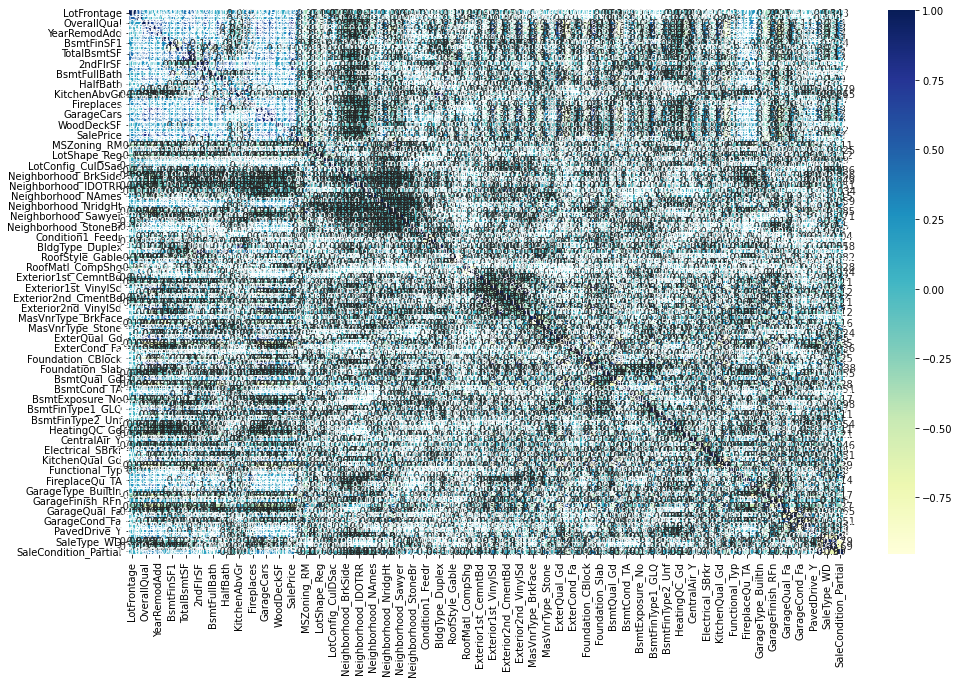

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Training the model

In [41]:
df_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_TA', 'GarageCond_Fa',
       'GarageCond_TA', 'PavedDrive_Y', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=107)

In [42]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('SalePrice')
X_train = df_train

In [43]:
import statsmodels.api as sm
#Adding a constant - Column of all 1's to the input data (X_train)
X_train_lm = sm.add_constant(X_train)  
#OLS - Ordinary Least Squares - Estimates coefficients of a linear regression model 
lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())

const                   -0.083786
LotFrontage             -0.030949
LotArea                  0.070363
OverallQual              0.111781
YearBuilt               -0.032706
                           ...   
PavedDrive_Y             0.011744
SaleType_New             0.036155
SaleType_WD              0.003380
SaleCondition_Normal     0.007182
SaleCondition_Partial   -0.010972
Length: 107, dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     55.72
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.96e-272
Time:                        19:52:56   Log-Likelihood:                 1337.7
No. Observations:                 784   AIC:                            -2461.
Df Residuals:                     677   BIC: 

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
11             GrLivArea  1239.20
9               1stFlrSF   645.96
10              2ndFlrSF   271.60
100        GarageCond_TA   209.87
8            TotalBsmtSF   206.69
..                   ...      ...
39   Neighborhood_Sawyer     1.52
80          HeatingQC_Fa     1.45
42   Neighborhood_Timber     1.42
26          LotShape_IR2     1.39
65          ExterCond_Fa     1.37

[106 rows x 2 columns]

In [45]:
#Dropping 'GrLivArea'
X = X_train.drop('GrLivArea', 1,)
#Retrain model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     56.28
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          5.38e-273
Time:                        19:53:03   Log-Likelihood:                 1337.3
No. Observations:                 784   AIC:                            -2463.
Df Residuals:                     678   BIC:                            -1968.
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

Features     VIF
8           TotalBsmtSF  206.06
99        GarageCond_TA  202.20
48     RoofMatl_CompShg  198.18
97        GarageQual_TA  122.33
3             YearBuilt  115.59
..                  ...     ...
38  Neighborhood_Sawyer    1.52
79         HeatingQC_Fa    1.44
41  Neighborhood_Timber    1.42
25         LotShape_IR2    1.39
64         ExterCond_Fa    1.37

[105 rows x 2 columns]

In [46]:
#Dropping 'TotalBsmtSF'
X = X.drop('TotalBsmtSF', 1,)
#Retrain model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_3.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     56.86
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          9.18e-274
Time:                        19:53:11   Log-Likelihood:                 1337.0
No. Observations:                 784   AIC:                            -2464.
Df Residuals:                     679   BIC:                            -1974.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

Features     VIF
98        GarageCond_TA  201.99
47     RoofMatl_CompShg  194.99
96        GarageQual_TA  122.05
3             YearBuilt  115.21
45      RoofStyle_Gable   89.63
..                  ...     ...
37  Neighborhood_Sawyer    1.52
78         HeatingQC_Fa    1.44
40  Neighborhood_Timber    1.42
24         LotShape_IR2    1.39
63         ExterCond_Fa    1.37

[104 rows x 2 columns]

In [47]:
#Dropping 'GarageCond_TA'
X = X.drop('GarageCond_TA', 1,)
#Retrain model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_4.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     57.36
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.41e-274
Time:                        19:53:19   Log-Likelihood:                 1336.2
No. Observations:                 784   AIC:                            -2464.
Df Residuals:                     680   BIC:                            -1979.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.06

Features     VIF
47     RoofMatl_CompShg  191.82
3             YearBuilt  114.74
45      RoofStyle_Gable   89.63
96        GarageQual_TA   87.93
58      MasVnrType_None   63.82
..                  ...     ...
37  Neighborhood_Sawyer    1.52
78         HeatingQC_Fa    1.44
40  Neighborhood_Timber    1.41
24         LotShape_IR2    1.39
63         ExterCond_Fa    1.37

[103 rows x 2 columns]

In [48]:
#Dropping 'RoofMatl_CompShg'
X = X.drop('RoofMatl_CompShg', 1,)
#Retrain model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_5.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     53.42
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.49e-264
Time:                        19:53:27   Log-Likelihood:                 1307.4
No. Observations:                 784   AIC:                            -2409.
Df Residuals:                     681   BIC:                            -1928.
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

Features     VIF
3             YearBuilt  114.65
95        GarageQual_TA   86.63
50  Exterior1st_VinylSd   63.10
57      MasVnrType_None   62.03
54  Exterior2nd_VinylSd   60.53
..                  ...     ...
77         HeatingQC_Fa    1.44
47     RoofMatl_WdShngl    1.41
40  Neighborhood_Timber    1.40
24         LotShape_IR2    1.39
62         ExterCond_Fa    1.36

[102 rows x 2 columns]

In [49]:
#Dropping 'YearBuilt'
X = X.drop('YearBuilt', 1,)
#Retrain model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_6.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     53.75
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          9.75e-265
Time:                        19:53:34   Log-Likelihood:                 1305.6
No. Observations:                 784   AIC:                            -2407.
Df Residuals:                     682   BIC:                            -1931.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.06

Features    VIF
94        GarageQual_TA  84.66
49  Exterior1st_VinylSd  63.05
56      MasVnrType_None  61.91
53  Exterior2nd_VinylSd  60.53
44      RoofStyle_Gable  56.18
..                  ...    ...
76         HeatingQC_Fa   1.43
46     RoofMatl_WdShngl   1.40
39  Neighborhood_Timber   1.40
23         LotShape_IR2   1.39
61         ExterCond_Fa   1.36

[101 rows x 2 columns]

In [50]:
#Dropping 'GarageQual_TA'
X = X.drop('GarageQual_TA', 1,)
#Retrain model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_7.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     54.08
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          6.43e-265
Time:                        19:53:41   Log-Likelihood:                 1303.7
No. Observations:                 784   AIC:                            -2405.
Df Residuals:                     683   BIC:                            -1934.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

Features    VIF
49  Exterior1st_VinylSd  62.84
53  Exterior2nd_VinylSd  60.38
56      MasVnrType_None  59.65
44      RoofStyle_Gable  55.69
16          GarageYrBlt  49.83
..                  ...    ...
76         HeatingQC_Fa   1.43
46     RoofMatl_WdShngl   1.40
39  Neighborhood_Timber   1.40
23         LotShape_IR2   1.39
61         ExterCond_Fa   1.36

[100 rows x 2 columns]

#### RFE - Recursive feature elimination
Let's use RFE to pick top 15 features and see how that works for us

In [51]:
#Re-run below train-test split and scaling to try RFE
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

vars_to_scale.columns

#Scaling will be applied to all the columns except the yes-no, 'dummy' variables and categorical variables
df_train[vars_to_scale.columns] = scaler.fit_transform(df_train[vars_to_scale.columns])
print(df_train.head())
print(df_train.describe())

df_train.columns

(784, 107)
(337, 107)
     LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
372     0.099315  0.084580        0.500   0.806202      0.566667      0.0000   
814     0.082192  0.100027        0.375   0.294574      0.000000      0.0000   
297     0.154110  0.087805        0.625   0.906977      0.800000      1.0000   
339     0.154110  0.159802        0.500   0.604651      0.800000      0.1100   
527     0.157534  0.196484        0.875   0.992248      0.966667      0.1675   

     BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageFinish_Unf  \
372    0.110383   0.000000     0.121768  0.073813  ...                 1   
814    0.000000   0.318625     0.112275  0.058298  ...                 1   
297    0.114989   0.151417     0.159574  0.126234  ...                 0   
339    0.103650   0.292615     0.198854  0.182652  ...                 1   
527    0.235648   0.056665     0.237643  0.244006  ...                 0   

     GarageQual_Fa  GarageQual_TA  Garag

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_TA', 'GarageCond_Fa',
       'GarageCond_TA', 'PavedDrive_Y', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=107)

In [52]:
#create X_train,y_train 
y_train = df_train.pop('SalePrice')
X_train = df_train

In [53]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_TA', 'GarageCond_Fa',
       'GarageCond_TA', 'PavedDrive_Y', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=106)

In [54]:
from sklearn.feature_selection import RFE
#Pick top 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 52),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('YearBuilt', False, 44),
 ('YearRemodAdd', False, 33),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 45),
 ('BsmtUnfSF', False, 48),
 ('TotalBsmtSF', False, 27),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 14),
 ('FullBath', False, 13),
 ('HalfBath', False, 43),
 ('BedroomAbvGr', False, 85),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 2),
 ('Fireplaces', False, 54),
 ('GarageYrBlt', False, 26),
 ('GarageCars', True, 1),
 ('GarageArea', False, 66),
 ('WoodDeckSF', False, 42),
 ('OpenPorchSF', False, 25),
 ('MSZoning_RL', False, 61),
 ('MSZoning_RM', False, 84),
 ('LotShape_IR2', False, 68),
 ('LotShape_Reg', False, 67),
 ('LandContour_HLS', False, 53),
 ('LotConfig_CulDSac', False, 10),
 ('Neighborhood_BrDale', False, 16),
 ('Neighborhood_BrkSide', False, 92),
 ('Neighborhood_Edwards', False, 15),
 ('Neighborhood_IDOTRR', False, 38),
 ('Neigh

In [56]:
#Columns shortlisted
shortlisted_cols = X_train.columns[rfe.support_]
shortlisted_cols

Index(['LotArea', 'OverallQual', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Exterior1st_CemntBd'],
      dtype='object')

In [57]:
#Columns eliminated
eliminated_cols = X_train.columns[~rfe.support_]
eliminated_cols

Index(['LotFrontage', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2',
       'LotShape_Reg', 'LandContour_HLS', 'LotConfig_CulDSac',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_NAmes', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_Timber',
       'Condition1_Feedr', 'Condition1_Norm', 'BldgType_Duplex',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQ

#### Model Building - Using features selected using RFE

In [58]:
X_train_rfe = X_train[shortlisted_cols]

In [59]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [60]:
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     227.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          3.06e-270
Time:                        19:53:50   Log-Likelihood:                 1110.0
No. Observations:                 784   AIC:                            -2188.
Df Residuals:                     768   BIC:                            -2113.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1818      0.026     -7.087      0.000      -0.232      -0.131
LotArea                  0.1832      0.032      5.808      0.000       0.121       0.245
OverallQual              0.2771      0.020     14.012      0.000       0.238       0.316
MasVnrArea               0.1017      0.022      4.602      0.000       0.058       0.145
1stFlrSF                 0.4364      0.244      1.790      0.074      -0.042       0.915
2ndFlrSF                 0.1329      0.104      1.281      0.201      -0.071       0.337
GrLivArea               -0.0517      0.293     -0.176      0.860      -0.627       0.524
KitchenAbvGr            -0.0726      0.012     -6.003      0.000      -0.096      -0.049
GarageCars               0.0943      0.013      7.305      0.000       0.069       0.120
Neighborhood_MeadowV    -0.0728      0.026     -2.853      0.004      -0.123      -0.023
Neighborhood_NoRidge     0.0611      0.014      4.382      0.000       0.034       0.088
Neighborhood_NridgHt     0.0801      0.010      7.679      0.000       0.060       0.101
Neighborhood_StoneBr     0.1068      0.018      5.934      0.000       0.071       0.142
RoofMatl_CompShg         0.1063      0.023      4.690      0.000       0.062       0.151
RoofMatl_WdShngl         0.1219      0.037      3.295      0.001       0.049       0.195
Exterior1st_CemntBd      0.0718      0.013      5.354      0.000       0.045       0.098
==============================================================================
Omnibus:                      241.548   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13708.084
Skew:                          -0.512   Prob(JB):                         0.00
Kurtosis:                      23.459   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
6              GrLivArea  182.91
0                  const  146.61
5               2ndFlrSF  132.43
4               1stFlrSF  109.44
2            OverallQual    2.47
13      RoofMatl_CompShg    1.73
8             GarageCars    1.72
15   Exterior1st_CemntBd    1.57
14      RoofMatl_WdShngl    1.55
1                LotArea    1.53
3             MasVnrArea    1.52
9   Neighborhood_MeadowV    1.46
11  Neighborhood_NridgHt    1.34
10  Neighborhood_NoRidge    1.28
12  Neighborhood_StoneBr    1.18
7           KitchenAbvGr    1.16

In [62]:
#Dropping 'GrLivArea'
X = X_train_rfe.drop('GrLivArea', 1,)
#Retrain model
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     243.9
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.95e-271
Time:                        19:53:50   Log-Likelihood:                 1110.0
No. Observations:                 784   AIC:                            -2190.
Df Residuals:                     769   BIC:                            -2120.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1820 

Features     VIF
0                  const  146.45
2            OverallQual    2.46
4               1stFlrSF    2.40
12      RoofMatl_CompShg    1.73
7             GarageCars    1.72
5               2ndFlrSF    1.62
14   Exterior1st_CemntBd    1.57
13      RoofMatl_WdShngl    1.55
1                LotArea    1.53
3             MasVnrArea    1.52
8   Neighborhood_MeadowV    1.46
10  Neighborhood_NridgHt    1.34
9   Neighborhood_NoRidge    1.28
11  Neighborhood_StoneBr    1.18
6           KitchenAbvGr    1.16

#### Final Model: lr_2 (Train data)
- No. of Features: 14
- All VIF values are below 5
- P-value for all columns is less than 0.05
- R-squared and Adjusted R-squared values are 81%

#### Residual analysis on Training Data
Now let's check if the error terms are also normally distributed by plotting the histogram of the error terms and see what it looks like.

In [63]:
y_train_sp = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

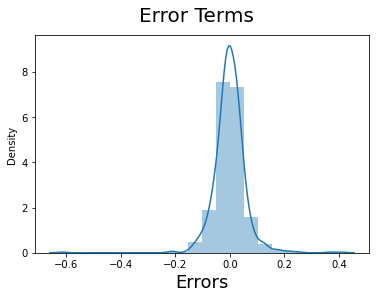

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_sp), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)         

We can see that the residuals are scattered around 0 as expected. So let's move further.

### Predictions and Evaluations
Now that we have fitted the model and checked the Error distribution, let's go ahead and make predictions using the final, i.e. lr_2

#### Rescaling test sets

This is an important step because we have trained the data with scaled values, so we if pass data which is in a different scale or range for test set then the predictions will not be accurate.
Notice that this time around we are only doing transform on the test data set and not fit_transform. This is because we will use the same scaling rules from training data set (xmin, xmax) to scale the test dataset.

In [65]:
#Scaling will be applied to all the columns except the yes-no, 'dummy' variables and categorical variables. Same as what we did on df_train
df_test[vars_to_scale.columns] = scaler.transform(df_test[vars_to_scale.columns])
print(df_test.head())
print(df_test.describe())

df_test.columns

      LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
262      0.229452  0.103238        0.500   0.751938      0.750000     0.02875   
998      0.133562  0.122169        0.125   0.325581      0.000000     0.00000   
1451     0.195205  0.114625        0.750   0.992248      0.983333     0.12125   
193      0.010274  0.017593        0.625   0.961240      0.900000     0.03125   
727      0.147260  0.086581        0.625   0.984496      0.950000     0.05125   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageFinish_Unf  \
262     0.089653   0.000000     0.082815  0.181946  ...                 1   
998     0.000000   0.467719     0.164812  0.150212  ...                 1   
1451    0.000000   0.730608     0.257447  0.267983  ...                 0   
193     0.000000   0.450534     0.158756  0.125059  ...                 1   
727     0.128278   0.235950     0.201637  0.186648  ...                 0   

      GarageQual_Fa  GarageQual_TA  GarageCond_Fa 

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_TA', 'GarageCond_Fa',
       'GarageCond_TA', 'PavedDrive_Y', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object', length=107)

In [66]:
#Dividing into X_test and y_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [67]:
X_test_rfe = X_test[shortlisted_cols]
#print(X_test[shortlisted_cols])

In [68]:
# Adding constant variable to test dataframe
X_test_rfe = sm.add_constant(X_test_rfe)

In [69]:
X_test_rfe.columns

Index(['const', 'LotArea', 'OverallQual', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'GarageCars', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Exterior1st_CemntBd'],
      dtype='object')

In [70]:
X_test_rfe = X_test_rfe.drop(["GrLivArea"], axis = 1)

In [71]:
# Making predictions using the final model
y_pred_rfe = lr_2.predict(X_test_rfe)

In [72]:
#Evaluate model - compute R squared
r2 = r2_score(y_true=y_test, y_pred=y_pred_rfe)
r2

0.7637371092637526

Text(0, 0.5, 'y_pred')

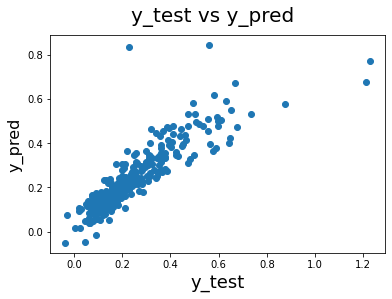

In [73]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_rfe)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [74]:
# Calculate predicted values for the train set
y_pred_train = lr_2.predict(X_train_lm)

# Calculate predicted values for the test set
y_pred_test = lr_2.predict(X_test_rfe)

# Calculate residuals for train set
residuals_train = y_train - y_pred_train

# Calculate residuals for test set
residuals_test = y_test - y_pred_test

# Calculate R2 score for both training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate Residual Sum of Squares (RSS) for both training and test sets
rss_train = np.sum(np.square(y_train - y_pred_train))
rss_test = np.sum(np.square(y_test - y_pred_test))

# Calculate MSE for train set
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate MSE for test set
mse_test = mean_squared_error(y_test, y_pred_test)
# Calculate RMSE for train set
rmse_train = mse_train**0.5

# Calculate RMSE for test set
rmse_test = mse_test**0.5

print("Train Set:")
print("R-squared (R2):", r2_train)
print("Residual Sum of Squares (RSS):", rss_train)
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTest Set:")
print("R-squared (R2):", r2_test)
print("Residual Sum of Squares (RSS):", rss_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)


linear_metrics = {
    'R2 Score (Train)': r2_train,
    'R2 Score (Test)': r2_test,
    'RSS (Train)': rss_train,
    'RSS (Test)': rss_test,
    'MSE (Train)': mse_train,
    'MSE (Test)': mse_test,
    'RMSE (Train)': rmse_train,
    'RMSE (Test)': rmse_test
}

linear_metrics_df = pd.DataFrame(linear_metrics.items(), columns=['Metric', 'Linear Regression'])

Train Set:
R-squared (R2): 0.8161975985192279
Residual Sum of Squares (RSS): 2.7042181128499667
Mean Squared Error (MSE): 0.0034492577970025085
Root Mean Squared Error (RMSE): 0.0587303822310268

Test Set:
R-squared (R2): 0.7637371092637526
Residual Sum of Squares (RSS): 2.1418603583761175
Mean Squared Error (MSE): 0.006355668719216966
Root Mean Squared Error (RMSE): 0.07972244802574094


### Ridge Regression

In [75]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

#cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#fitting the training model
model_cv.fit(X_train_lm, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
#best alpha value
print(model_cv.best_params_)

{'alpha': 0.3}


In [77]:
#Fitting Ridge model for alpha = 0.3 and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
print(ridge.coef_)

[ 0.          0.18085654  0.27909759  0.10395677  0.36380043  0.11001309
 -0.07008466  0.09849634 -0.07202943  0.06248192  0.08080876  0.1063026
  0.09223078  0.10406185  0.07229082]


In [78]:
# Make predictions on the training and test datasets
y_train_pred_ridge = ridge.predict(X_train_lm)
y_test_pred_ridge = ridge.predict(X_test_rfe)

# Calculate R2 score for both training and test sets
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Calculate Residual Sum of Squares (RSS) for both training and test sets
rss_train_ridge = np.sum(np.square(y_train - y_train_pred_ridge))
rss_test_ridge = np.sum(np.square(y_test - y_test_pred_ridge))

# Calculate Mean Squared Error (MSE) for both training and test sets
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Calculate Root Mean Squared Error (RMSE) for both training and test sets
rmse_train_ridge = mse_train_ridge**0.5
rmse_test_ridge = mse_test_ridge**0.5

# Print the results
print("R2 (Train):", r2_train_ridge)
print("R2 (Test):", r2_test_ridge)
print("RSS (Train):", rss_train_ridge)
print("RSS (Test):", rss_test_ridge)
print("MSE (Train):", mse_train_ridge)
print("MSE (Test):", mse_test_ridge)
print("RMSE (Train):", rmse_train_ridge)
print("RMSE (Test):", rmse_test_ridge)


ridge_metrics = {
    'R2 Score (Train)': r2_train_ridge,
    'R2 Score (Test)': r2_test_ridge,
    'RSS (Train)': rss_train_ridge,
    'RSS (Test)': rss_test_ridge,
    'MSE (Train)': mse_train_ridge,
    'MSE (Test)': mse_test_ridge,
    'RMSE (Train)': rmse_train_ridge,
    'RMSE (Test)': rmse_test_ridge
}

ridge_metrics_df = pd.DataFrame(ridge_metrics.items(), columns=['Metric', 'Ridge Regression'])

R2 (Train): 0.815911551445075
R2 (Test): 0.7625082286628305
RSS (Train): 2.708426619772729
RSS (Test): 2.153000874925671
MSE (Train): 0.00345462579052644
MSE (Test): 0.006388726631826917
RMSE (Train): 0.0587760647757779
RMSE (Test): 0.07992951039401479


## Lasso Regression

In [79]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [81]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lm, y_train) 

Lasso(alpha=0.0001)

In [82]:
lasso.coef_

array([ 0.        ,  0.17446048,  0.28400602,  0.09865   ,  0.37398166,
        0.110314  , -0.06809127,  0.09708841, -0.05878928,  0.06000217,
        0.0789681 ,  0.10387526,  0.08125831,  0.08116632,  0.066739  ])

In [83]:
# Make predictions on the training and test datasets using the Lasso model
y_train_pred_lasso = lasso.predict(X_train_lm)
y_test_pred_lasso = lasso.predict(X_test_rfe)  

# Calculate R-squared for both train and test sets
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Calculate Residual Sum of Squares (RSS) for both train and test sets
rss_train_lasso = np.sum(np.square(y_train - y_train_pred_lasso))
rss_test_lasso = np.sum(np.square(y_test - y_test_pred_lasso))

# Calculate Mean Squared Error (MSE) for both train and test sets
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

# Calculate Root Mean Squared Error (RMSE) for both train and test sets
rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

# Print the results
print("Lasso Model Metrics:")
print("R-squared (Train):", r2_train_lasso)
print("R-squared (Test):", r2_test_lasso)
print("RSS (Train):", rss_train_lasso)
print("RSS (Test):", rss_test_lasso)
print("MSE (Train):", mse_train_lasso)
print("MSE (Test):", mse_test_lasso)
print("RMSE (Train):", rmse_train_lasso)
print("RMSE (Test):", rmse_test_lasso)

lasso_metrics = {
    'R2 Score (Train)': r2_train_lasso,
    'R2 Score (Test)': r2_test_lasso,
    'RSS (Train)': rss_train_lasso,
    'RSS (Test)': rss_test_lasso,
    'MSE (Train)': mse_train_lasso,
    'MSE (Test)': mse_test_lasso,
    'RMSE (Train)': rmse_train_lasso,
    'RMSE (Test)': rmse_test_lasso
}

lasso_metrics_df = pd.DataFrame(lasso_metrics.items(), columns=['Metric', 'Lasso Regression'])

Lasso Model Metrics:
R-squared (Train): 0.815551879349436
R-squared (Test): 0.7645186801616004
RSS (Train): 2.713718344950843
RSS (Test): 2.134774964143684
MSE (Train): 0.00346137543998832
MSE (Test): 0.006334643810515383
RMSE (Train): 0.058833455108367724
RMSE (Test): 0.0795904756268951


### Summary metrics table

In [84]:
final_metric = pd.merge(linear_metrics_df, ridge_metrics_df, on='Metric')
final_metric = pd.merge(final_metric, lasso_metrics_df, on='Metric')

In [85]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.816198          0.815912          0.815552
1   R2 Score (Test)           0.763737          0.762508          0.764519
2       RSS (Train)           2.704218          2.708427          2.713718
3        RSS (Test)           2.141860          2.153001          2.134775
4       MSE (Train)           0.003449          0.003455          0.003461
5        MSE (Test)           0.006356          0.006389          0.006335
6      RMSE (Train)           0.058730          0.058776          0.058833
7       RMSE (Test)           0.079722          0.079930          0.079590

# Subjective Questions

### Question 1

#### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer:

Optimal value of alpha for Ridge regression: 0.3
Optimal value of alpha for Lasso regression: 0.0001

Let's create a new model with doubled alpha values for Ridge and Lasso

#### Ridge - Alpha: 0.3, Doubled alpha: 0.6

In [86]:
ridge_doubled_alpha = 0.6
alphaDouble_ridge = Ridge(alpha=ridge_doubled_alpha)

alphaDouble_ridge.fit(X_train_lm, y_train)
print(alphaDouble_ridge.coef_)

[ 0.          0.17705115  0.27967476  0.10546989  0.33976928  0.10636802
 -0.06821907  0.10217004 -0.07118831  0.06363603  0.08150884  0.10573505
  0.08081986  0.09084895  0.07255607]


In [87]:
# Make predictions on the training and test datasets
y_train_pred_ridge = alphaDouble_ridge.predict(X_train_lm)
y_test_pred_ridge = alphaDouble_ridge.predict(X_test_rfe)

# Calculate R2 score for both training and test sets
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Calculate Residual Sum of Squares (RSS) for both training and test sets
rss_train_ridge = np.sum(np.square(y_train - y_train_pred_ridge))
rss_test_ridge = np.sum(np.square(y_test - y_test_pred_ridge))

# Calculate Mean Squared Error (MSE) for both training and test sets
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Calculate Root Mean Squared Error (RMSE) for both training and test sets
rmse_train_ridge = mse_train_ridge**0.5
rmse_test_ridge = mse_test_ridge**0.5

# Print the results
print("R2 (Train):", r2_train_ridge)
print("R2 (Test):", r2_test_ridge)
print("RSS (Train):", rss_train_ridge)
print("RSS (Test):", rss_test_ridge)
print("MSE (Train):", mse_train_ridge)
print("MSE (Test):", mse_test_ridge)
print("RMSE (Train):", rmse_train_ridge)
print("RMSE (Test):", rmse_test_ridge)


doubledAlpha_ridge_metrics = {
    'R2 Score (Train)': r2_train_ridge,
    'R2 Score (Test)': r2_test_ridge,
    'RSS (Train)': rss_train_ridge,
    'RSS (Test)': rss_test_ridge,
    'MSE (Train)': mse_train_ridge,
    'MSE (Test)': mse_test_ridge,
    'RMSE (Train)': rmse_train_ridge,
    'RMSE (Test)': rmse_test_ridge
}

doubledAlpha_ridge_metrics_df = pd.DataFrame(doubledAlpha_ridge_metrics.items(), columns=['Metric', 'DoubledAlpha Ridge Regression'])

R2 (Train): 0.815234926968007
R2 (Test): 0.761545937655328
RSS (Train): 2.7183815504577664
RSS (Test): 2.1617246019391203
MSE (Train): 0.0034673234061961306
MSE (Test): 0.006414613062133888
RMSE (Train): 0.05888398259455733
RMSE (Test): 0.08009127956359474


#### Lasso - Alpha: 0.0001, Doubled alpha: 0.0002

In [88]:
alpha =0.0001

alphaDouble_lasso = Lasso(alpha=alpha)
        
alphaDouble_lasso.fit(X_train_lm, y_train) 

alphaDouble_lasso.coef_

array([ 0.        ,  0.17446048,  0.28400602,  0.09865   ,  0.37398166,
        0.110314  , -0.06809127,  0.09708841, -0.05878928,  0.06000217,
        0.0789681 ,  0.10387526,  0.08125831,  0.08116632,  0.066739  ])

In [89]:
# Make predictions on the training and test datasets using the Lasso model
y_train_pred_lasso = alphaDouble_lasso.predict(X_train_lm)
y_test_pred_lasso = alphaDouble_lasso.predict(X_test_rfe)  

# Calculate R-squared for both train and test sets
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Calculate Residual Sum of Squares (RSS) for both train and test sets
rss_train_lasso = np.sum(np.square(y_train - y_train_pred_lasso))
rss_test_lasso = np.sum(np.square(y_test - y_test_pred_lasso))

# Calculate Mean Squared Error (MSE) for both train and test sets
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)

# Calculate Root Mean Squared Error (RMSE) for both train and test sets
rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

# Print the results
print("Lasso Model Metrics:")
print("R-squared (Train):", r2_train_lasso)
print("R-squared (Test):", r2_test_lasso)
print("RSS (Train):", rss_train_lasso)
print("RSS (Test):", rss_test_lasso)
print("MSE (Train):", mse_train_lasso)
print("MSE (Test):", mse_test_lasso)
print("RMSE (Train):", rmse_train_lasso)
print("RMSE (Test):", rmse_test_lasso)

doubledAlpha_lasso_metrics = {
    'R2 Score (Train)': r2_train_lasso,
    'R2 Score (Test)': r2_test_lasso,
    'RSS (Train)': rss_train_lasso,
    'RSS (Test)': rss_test_lasso,
    'MSE (Train)': mse_train_lasso,
    'MSE (Test)': mse_test_lasso,
    'RMSE (Train)': rmse_train_lasso,
    'RMSE (Test)': rmse_test_lasso
}

doubledAlpha_lasso_metrics_df = pd.DataFrame(doubledAlpha_lasso_metrics.items(), columns=['Metric', 'DoubledAlpha Lasso Regression'])

Lasso Model Metrics:
R-squared (Train): 0.815551879349436
R-squared (Test): 0.7645186801616004
RSS (Train): 2.713718344950843
RSS (Test): 2.134774964143684
MSE (Train): 0.00346137543998832
MSE (Test): 0.006334643810515383
RMSE (Train): 0.058833455108367724
RMSE (Test): 0.0795904756268951


### Summary metrics 

In [90]:
final_metric = pd.merge(final_metric, doubledAlpha_ridge_metrics_df, on='Metric')
final_metric = pd.merge(final_metric, doubledAlpha_lasso_metrics_df, on='Metric')
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0  R2 Score (Train)           0.816198          0.815912          0.815552   
1   R2 Score (Test)           0.763737          0.762508          0.764519   
2       RSS (Train)           2.704218          2.708427          2.713718   
3        RSS (Test)           2.141860          2.153001          2.134775   
4       MSE (Train)           0.003449          0.003455          0.003461   
5        MSE (Test)           0.006356          0.006389          0.006335   
6      RMSE (Train)           0.058730          0.058776          0.058833   
7       RMSE (Test)           0.079722          0.079930          0.079590   

   DoubledAlpha Ridge Regression  DoubledAlpha Lasso Regression  
0                       0.815235                       0.815552  
1                       0.761546                       0.764519  
2                       2.718382                       2.713718  
3                       2.161725                       2.134775  
4                       0.003467                       0.003461  
5                       0.006415                       0.006335  
6                       0.058884                       0.058833  
7                       0.080091                       0.079590

In [91]:
#Identifying most important predictor variables after change is implemented - Ridge
ridge_coef_df = pd.DataFrame({
    'Feature': X_train_lm.columns,
    'Coefficient': alphaDouble_ridge.coef_,
    'AbsCoefficient': abs(ridge.coef_)
})

print(ridge_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                 Feature  Coefficient  AbsCoefficient
4               1stFlrSF     0.339769        0.363800
2            OverallQual     0.279675        0.279098
1                LotArea     0.177051        0.180857
5               2ndFlrSF     0.106368        0.110013
11  Neighborhood_StoneBr     0.105735        0.106303
13      RoofMatl_WdShngl     0.090849        0.104062
3             MasVnrArea     0.105470        0.103957
7             GarageCars     0.102170        0.098496
12      RoofMatl_CompShg     0.080820        0.092231
10  Neighborhood_NridgHt     0.081509        0.080809


In [92]:
#Identifying most important predictor variables after change is implemented - Lasso
lasso_coef_df = pd.DataFrame({
    'Feature': X_train_lm.columns,
    'Coefficient': alphaDouble_lasso.coef_,
    'AbsCoefficient': abs(lasso.coef_)
})

print(lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(10))

                 Feature  Coefficient  AbsCoefficient
4               1stFlrSF     0.373982        0.373982
2            OverallQual     0.284006        0.284006
1                LotArea     0.174460        0.174460
5               2ndFlrSF     0.110314        0.110314
11  Neighborhood_StoneBr     0.103875        0.103875
3             MasVnrArea     0.098650        0.098650
7             GarageCars     0.097088        0.097088
12      RoofMatl_CompShg     0.081258        0.081258
13      RoofMatl_WdShngl     0.081166        0.081166
10  Neighborhood_NridgHt     0.078968        0.078968


### Question 3

#### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer

Let's remove the top 5 features and re-build Ridge and Lasso models

In [93]:
#Ridge
#Fetch top 5 features
ridge_top5 = ridge_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5)["Feature"]
print(ridge_top5)

4                 1stFlrSF
2              OverallQual
1                  LotArea
5                 2ndFlrSF
11    Neighborhood_StoneBr
Name: Feature, dtype: object


In [94]:
#Let's remove these top 5 from the training set
X_train_copy_1 = X_train_lm
X_train_lm_ridge = X_train_copy_1.drop(ridge_top5, axis=1)

In [95]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_exclTop5 = Ridge()

#cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge_exclTop5, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
#fitting the training model
model_cv.fit(X_train_lm_ridge, y_train)

#best alpha value
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.7}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


In [96]:
#Fitting Ridge model for alpha = 0.3 and printing coefficients which have been penalised
alpha = 0.7
ridge_exclTop5 = Ridge(alpha=alpha)

ridge_exclTop5.fit(X_train_lm_ridge, y_train)
print(ridge_exclTop5.coef_)

[ 0.          0.25507314 -0.09644259  0.26805492 -0.20972434  0.11411566
  0.11763103 -0.05109043  0.08553741  0.1630371 ]


In [97]:
#After elimination of initial Top 5 - Here are the other important predictor variables: Ridge
ridge_exclTop5_coef_df = pd.DataFrame({
    'Feature': X_train_lm_ridge.columns,
    'Coefficient': ridge_exclTop5.coef_,
    'AbsCoefficient': abs(ridge_exclTop5.coef_)
})

print(ridge_exclTop5_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))

                Feature  Coefficient  AbsCoefficient
3            GarageCars     0.268055        0.268055
1            MasVnrArea     0.255073        0.255073
4  Neighborhood_MeadowV    -0.209724        0.209724
9   Exterior1st_CemntBd     0.163037        0.163037
6  Neighborhood_NridgHt     0.117631        0.117631


Let's repeat the same using Lasso

In [98]:
#Lasso
#Fetch top 5 features
lasso_top5 = lasso_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5)["Feature"]
print(lasso_top5)

4                 1stFlrSF
2              OverallQual
1                  LotArea
5                 2ndFlrSF
11    Neighborhood_StoneBr
Name: Feature, dtype: object


In [99]:
X_train_copy_2 = X_train_lm
X_train_lm_lasso = X_train_copy_2.drop(lasso_top5, axis=1)

In [100]:
lasso_exclTop5 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso_exclTop5, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm_lasso, y_train) 

print(model_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


In [101]:
alpha =0.0001

lasso_exclTop5 = Lasso(alpha=alpha)

lasso_exclTop5.fit(X_train_lm_lasso, y_train)
print(ridge_exclTop5.coef_)

[ 0.          0.25507314 -0.09644259  0.26805492 -0.20972434  0.11411566
  0.11763103 -0.05109043  0.08553741  0.1630371 ]


In [102]:
#After elimination of initial Top 5 - Here are the other important predictor variables: Lasso
lasso_exclTop5_coef_df = pd.DataFrame({
    'Feature': X_train_lm_lasso.columns,
    'Coefficient': lasso_exclTop5.coef_,
    'AbsCoefficient': abs(lasso_exclTop5.coef_)
})

print(lasso_exclTop5_coef_df.sort_values(by = 'AbsCoefficient', ascending = False).head(5))

                Feature  Coefficient  AbsCoefficient
3            GarageCars     0.269467        0.269467
1            MasVnrArea     0.265815        0.265815
4  Neighborhood_MeadowV    -0.221374        0.221374
9   Exterior1st_CemntBd     0.166821        0.166821
6  Neighborhood_NridgHt     0.115126        0.115126
